## US01 - Introduction to Machine Learning ##

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
data = pd.read_csv('UTSEUS-anjuke-real-estate-baoshan.csv')

In [37]:
X = data[['longitude', 'latitude', 'bedroom', 'room', 'surface']]
Y = data['onesquaremeter']

In [38]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [ ]:
X

In [39]:
Z = pd.DataFrame.copy(Y)
Z[Y <= np.quantile(Y,0.25)] = 0
Z[(Y > np.quantile(Y,0.25)) & (Y <= np.quantile(Y,0.5))] = 1
Z[(Y > np.quantile(Y,0.5)) & (Y <= np.quantile(Y,0.75))] = 2
Z[Y > np.quantile(Y,0.75)] = 3

In [ ]:
Z

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Z_train, Z_test = train_test_split(X, Z, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
t = time.time()
param_grid = {'C': [0.1, 1, 10, 100]}
search = GridSearchCV(LinearSVC(), param_grid, cv=5)
search.fit(X_train, Z_train)
time.time()-t

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
t = time.time()
param_grid = {'n_estimators': [100, 200, 300, 500]}
clf = AdaBoostClassifier()
search = GridSearchCV(clf, param_grid, cv=5)
search.fit(X_train, Z_train)
time.time()-t

39.78092074394226

In [78]:
search.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)

In [79]:
search.best_score_

0.6116315378610461

In [80]:
clf = AdaBoostClassifier(n_estimators=500)
clf.fit(X_train, Z_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=500, random_state=None)

In [81]:
Z_pred = clf.predict(X_test)

In [74]:
Z_test

32876    0.0
6072     2.0
17935    3.0
1513     3.0
10389    3.0
7524     2.0
3922     3.0
16495    0.0
28908    3.0
20405    1.0
28382    1.0
33125    0.0
22537    3.0
5327     2.0
18238    1.0
18085    2.0
12555    0.0
3397     3.0
5282     1.0
34106    0.0
13328    0.0
10949    2.0
200      3.0
18360    1.0
19283    2.0
2071     3.0
27031    2.0
21989    1.0
13399    0.0
2133     3.0
        ... 
16215    0.0
23134    2.0
21286    2.0
3302     2.0
18362    2.0
4465     2.0
23920    2.0
27311    2.0
3974     2.0
31842    1.0
18417    3.0
9520     3.0
25877    2.0
17512    0.0
1775     3.0
25608    0.0
32041    0.0
5508     3.0
19573    0.0
30695    1.0
3877     3.0
5493     2.0
17291    0.0
10193    3.0
32086    0.0
21353    2.0
24479    3.0
57       1.0
34053    0.0
23663    0.0
Name: onesquaremeter, Length: 11358, dtype: float64

In [70]:
ZZ = Z_test.to_numpy()

In [71]:
ZZ

array([0., 2., 3., ..., 1., 0., 0.])

In [44]:
np.mean(Z_pred == Z_test)

0.5940306391970417

In [82]:
conf_matrix = np.zeros((4,4))
for k in range(len(Z_pred)):
    conf_matrix[int(Z_pred[k]), int(ZZ[k])]+=1
conf_matrix

array([[2020.,  435.,  260.,  168.],
       [ 528., 1638.,  635.,   96.],
       [ 229.,  600., 1443.,  632.],
       [  50.,  174.,  528., 1922.]])

In [86]:
conf_matrix[3,0]/np.sum(conf_matrix[3,:])

0.018698578908002993

In [10]:
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
clf = LinearSVC()
# scores = cross_val_score(clf, X_train, Z_train, cv=5)
t = time.time()
clf.fit(X_train, Z_train)
time.time()-t

C:\Users\xuphilip\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


4.23961615562439

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
clf = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.7955839628123185

[Text(167.4, 181.2, 'X[1] <= 31.348\nentropy = 0.5\nsamples = 34416\nvalue = [16751, 17665]'),
 Text(83.7, 108.72, 'X[4] <= 77.5\nentropy = 0.322\nsamples = 16401\nvalue = [3306, 13095]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.405\nsamples = 8640\nvalue = [2438, 6202]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.199\nsamples = 7761\nvalue = [868, 6893]'),
 Text(251.10000000000002, 108.72, 'X[1] <= 31.405\nentropy = 0.379\nsamples = 18015\nvalue = [13445, 4570]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.445\nsamples = 12966\nvalue = [8626, 4340]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.087\nsamples = 5049\nvalue = [4819, 230]')]

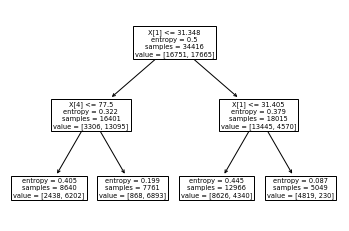

In [67]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X,Z)
tree.plot_tree(clf.fit(X,Z))

In [145]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [2, 4, 6, 8, 10, 20, 40], 'criterion': ['gini', 'entropy']}
search = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=ShuffleSplit(n_splits=5))
search.fit(X, Z)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=None, test_size=None, train_size=None),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', '

In [146]:
search.best_estimator_
search.best_params_

{'criterion': 'gini', 'max_depth': 20}

In [108]:
clf = tree.DecisionTreeClassifier(max_depth=20)
scores = cross_val_score(clf, X, Z, cv=ShuffleSplit(n_splits=5))
np.mean(scores)

0.8735618826263799

In [109]:
clf = tree.DecisionTreeClassifier(max_depth=20)
clf = clf.fit(X,Z)

In [115]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

from sklearn import svm
param_grid = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
search = GridSearchCV(svm.SVC(), param_grid, cv=ShuffleSplit(n_splits=5))
search.fit(X, Z)
search.best_estimator_
search.best_score_

0.7431725740848344